In [ ]:
# !pip install pandas_profiling --upgrade
# !pip install git+https://github.com/alberanid/imdbpy
!pip install IMDbPY

     |████████████████████████████████| 307kB 9.3MB/s 


In [ ]:
# Import Dataset
# Import File from Loacal Drive
# from google.colab import files
# data_to_load = files.upload()
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from imdb import IMDb

In [ ]:
path = '/content/drive/MyDrive/Files/'

df = pd.read_csv(path + 'movies.csv')

# df = df.iloc[:, 1 : 12]

df = df[4200: 8400:]

df

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
4200,4200,4201,Almost Human,2013,NaN,4.6,45%,0,1,0,0,0,NaN,"Action,Crime,Drama,Sci-Fi",United States,English,60.0
4201,4201,4202,Making Plans for Lena,2009,NaN,6.1,50%,0,1,0,0,0,Christophe Honoré,Drama,France,"French,German,English,Italian",105.0
4202,4202,4203,The Sweet Life,2017,NaN,6.2,NaN,0,1,1,0,0,Federico Fellini,"Comedy,Drama","Italy,France","Italian,English,French,German",174.0
4203,4203,4204,White Night Wedding,2008,NaN,6.7,29%,0,1,0,0,0,Baltasar Kormákur,"Comedy,Drama",Iceland,"Icelandic,English",96.0
4204,4204,4205,It Came from the Desert,2017,NaN,4.2,60%,0,1,1,0,0,Marko Mäkilaakso,"Action,Adventure,Comedy,Horror,Sci-Fi,Thriller","Finland,United Kingdom,Canada","English,Spanish",90.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8395,8395,8396,My Rebound Girl,2016,NaN,7.0,NaN,0,0,1,0,0,"Emmanuel Dela Cruz,Crisanto Aquino","Comedy,Romance",Philippines,"Filipino,Tagalog",110.0
8396,8396,8397,Srinivasa Kalyanam,2018,NaN,6.0,NaN,0,0,1,0,0,Satish Vegesna,"Drama,Family",India,Telugu,140.0
8397,8397,8398,Paper Tigers,2015,NaN,7.1,NaN,0,0,1,0,0,James Redford,"Documentary,Family",United States,English,102.0
8398,8398,8399,Satan's Little Helper,2004,18+,5.3,NaN,0,0,1,0,0,Jeff Lieberman,"Comedy,Horror",United States,English,96.0


In [ ]:
def data_investigate(df):
    print('No of Rows : ', df.shape[0])
    print('No of Coloums : ', df.shape[1])
    print('**'*25)
    print('Colums Names : \n', df.columns)
    print('**'*25)
    print('Datatype of Columns : \n', df.dtypes)
    print('**'*25)
    print('Missing Values : ')
    c = df.isnull().sum()
    c = c[c > 0]
    print(c)
    print('**'*25)
    print('Missing vaules %age wise :\n')
    print((100*(df.isnull().sum()/len(df.index))))
    print('**'*25)
    print('Pictorial Representation : ')
    plt.figure(figsize = (5, 5))
    sns.heatmap(df.isnull(), yticklabels = False, cbar = False)
    plt.show()

No of Rows :  4200
No of Coloums :  17
**************************************************
Colums Names : 
 Index(['Unnamed: 0', 'ID', 'Title', 'Year', 'Age', 'IMDb', 'Rotten Tomatoes',
       'Netflix', 'Hulu', 'Prime Video', 'Disney+', 'Type', 'Directors',
       'Genres', 'Country', 'Language', 'Runtime'],
      dtype='object')
**************************************************
Datatype of Columns : 
 Unnamed: 0           int64
ID                   int64
Title               object
Year                 int64
Age                 object
IMDb               float64
Rotten Tomatoes     object
Netflix              int64
Hulu                 int64
Prime Video          int64
Disney+              int64
Type                 int64
Directors           object
Genres              object
Country             object
Language            object
Runtime            float64
dtype: object
**************************************************
Missing Values : 
Age                2005
IMDb                 11
Rot

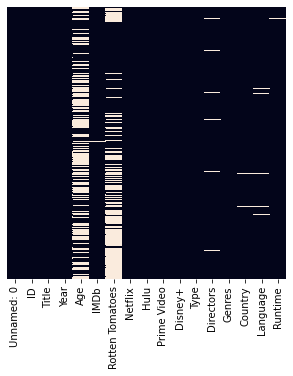

In [ ]:
data_investigate(df)

In [ ]:
ia = IMDb()

In [ ]:
i=0
count_id=0
count_d=0
count_g=0
count_co=0
count_l=0
count_r=0
count_c=0
count_p=0
count_ra=0
count_cast=0
count_ir=0
count_sc=0
count_t=0

m_director=[]
m_genre=[]
m_country=[]
m_language=[]
m_runtime=[]
m_certification=[]
m_plotline=[]
m_rating=[]
m_cast=[]
m_irating=[]
m_seasoncount=[]
m_type=[]

while(i<len(df.index)):
    val_type = df['Type'].values[i]
    if(val_type==0):
        val_movie = df['Title'].values[i]
        movies = ia.search_movie(val_movie)
        if(len(movies)!=0):
            movid = movies[0].movieID

            movie = ia.get_movie(movid)
            cert_movie = ia.get_movie(movid, info = 'parents_guide')
            print(movie)

            movie_directors=""
            movie_genres=""
            movie_country=""
            movie_language=""
            movie_runtime=""
            movie_certification = ""
            movie_plotline = ""
            movie_rating = ""
            movie_cast = ""
            movie_irating = ""
            movie_seasoncount = ""
            movie_type = ""
            c1=0
            c2=0
            c4=0
            c5=0
            c6=0
            c7=0
            c8=0
            c9=0
            c10=0
            c11=0
            c12=0
            c13=0
            movid=int(movid)
            if(movid>0):
                count_id+=1;
                print(count_id)

                try:
                    for director in movie['directors']:
                        if(c1==0):
                            count_d+=1
                            movie_directors = director['name']

                        else:
                            movie_directors = movie_directors+","+ director['name']
                        
                        c1+=1
                    m_director.append(movie_directors)
                except:
                    m_director.append("NA")

                try:
                    for genre in movie['genres']:
                        if(c2==0):
                            count_g+=1
                            movie_genres = genre

                        else:
                            movie_genres = movie_genres+"," +genre

                        c2+=1
                    m_genre.append(movie_genres)
                except:
                    m_genre.append("NA")

                try:
                    for countries in movie['countries']:
                        if(c4==0):
                            count_co+=1
                            movie_country = countries

                        else:
                            movie_country = movie_country+"," +countries

                        c4+=1
                    m_country.append(movie_country)
                except:
                    m_country.append("NA")

                try:
                    for languages in movie['languages']:
                        if(c5==0):
                            count_l+=1
                            movie_language = languages

                        else:
                            movie_language = movie_language+"," +languages

                        c5+=1
                    m_language.append(movie_language)
                except:
                    m_language.append("NA")

                try:
                    for runtime in movie['runtimes']:
                        if(c6==0):
                            count_r+=1
                            movie_runtime = runtime

                        else:
                            movie_runtime = movie_runtime+"," +runtime

                        c6+=1
                    m_runtime.append(movie_runtime)
                except:
                    m_runtime.append("NA")
                
                try:
                    for age_c in range(0, 1):
                        if(c7==0):
                            count_c+=1
                            temp_c = cert_movie['mpaa']
                            age_c = temp_c
                            movie_certification = age_c

                        else:
                            movie_certification = movie_certification+"," + age_c

                        c7+=1
                    m_certification.append(movie_certification)
                except:
                    m_certification.append("NA")
                
                try:
                    for plot in range(0, 1):
                        if(c8==0):
                            count_p+=1
                            plot = movie['plot outline']   
                            movie_plotline = plot

                        else:
                            movie_plotline = movie_plotline+"," + plot

                        c8+=1
                    m_plotline.append(movie_plotline)
                except:
                    m_plotline.append("NA")

                try:
                    for rating in range(0, 1):
                        if(c9==0):
                            count_ra+=1
                            rating = movie['rating']
                            movie_rating = rating

                        else:
                            movie_rating = movie_rating+"," + rating

                        c9+=1
                    m_rating.append(movie_rating)
                except:
                    m_rating.append("NA")

                try:
                    for cast in movie['cast']:
                        if(c10==0):
                            count_cast+=1
                            movie_cast = cast['name']

                        else:
                            movie_cast = movie_cast+","+ cast['name']

                        c10+=1
                    m_cast.append(movie_cast)
                except:
                    m_cast.append("NA")
                
                try:
                    for irating in movie['certificates']:
                        if(c11==0):
                            count_ir+=1
                            #if 'India' in irating:
                                #z = irating[6:]
                            movie_irating = irating

                        else:
                            movie_irating = movie_irating+"," + irating

                        c11+=1
                    m_irating.append(movie_irating)
                except:
                    m_irating.append("NA")
                
                try:
                    for seasoncount in range(0, 1):
                        if(c12==0):
                            count_sc+=1
                            seasoncount = movie['number of seasons']
                            movie_seasoncount = seasoncount

                        else:
                            movie_seasoncount = movie_seasoncount+"," + seasoncount

                        c12+=1
                    m_seasoncount.append(movie_seasoncount)
                except:
                    m_seasoncount.append("NA")

                try:
                    for mtype in range(0, 1):
                        if(c13==0):
                            count_t+=1
                            mtype = movie['kind']
                            movie_type = mtype

                        else:
                            movie_type = movie_type+"," + mtype

                        c13+=1
                    m_type.append(movie_type)
                except:
                    m_type.append("NA")
      
            else:
                pass
        else:
            m_director.append("NA")
            m_genre.append("NA")
            m_country.append("NA")
            m_language.append("NA")
            m_runtime.append("NA")
            m_certification.append("NA")
            m_plotline.append("NA")
            m_rating.append("NA")
            m_cast.append("NA")
            m_irating.append("NA")
            m_seasoncount.append("NA")
            m_type.append("NA")
    else:
        pass
    i=i+1

Almost Human
1
Making Plans for Lena
2
La Dolce Vita
3
White Night Wedding
4
It Came from the Desert
5
Ballet Now
6
The Collector
7
Donui mat
8
The Getaway
9
Mass Effect: Paragon Lost
10
Trapped: The Alex Cooper Story
11
All Around Us
12
Barbie Presents: Thumbelina
13
Madonna and the Breakfast Club
14
The Sound of Silence
15
Don't Go
16
Ozzy
17
Tell Them Anything You Want: A Portrait of Maurice Sendak
18
Breaking the Girls
19
Literally, Right Before Aaron
20
The Hidden Face
21
Pokémon the Movie: Diancie and the Cocoon of Destruction
22
The Simone Biles Story: Courage to Soar
23
Pokémon the Movie: Hoopa and the Clash of Ages
24
Curious George 2: Follow That Monkey!
25
I'll Come Running
26
Ron White: A Little Unprofessional
27
Out of the Dark
28
The Sender
29
Santa Hunters
30
Beers of Joy
31
Every Other Holiday
32
The Swan Princess: The Mystery of the Enchanted Treasure
33
Blurt
34
Eyes of an Angel
35
Good Time Max
36
Switching Goals
37
F*&% the Prom
38
Higher Power
39
Curious George: A 

2021-04-21 06:01:02,956 CRITICAL [imdbpy] /usr/local/lib/python3.7/dist-packages/imdb/_exceptions.py:34: IMDbDataAccessError exception raised; args: ({'errcode': None, 'errmsg': 'None', 'url': 'https://www.imdb.com/title/tt0088580/reference', 'proxy': '', 'exception type': 'IOError', 'original exception': timeout('The read operation timed out')},); kwds: {}
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/imdb/parser/http/__init__.py", line 220, in retrieve_unicode
    response = uopener.open(url)
  File "/usr/lib/python3.7/urllib/request.py", line 525, in open
    response = self._open(req, data)
  File "/usr/lib/python3.7/urllib/request.py", line 543, in _open
    '_open', req)
  File "/usr/lib/python3.7/urllib/request.py", line 503, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.7/urllib/request.py", line 1393, in https_open
    context=self._context, check_hostname=self._check_hostname)
  File "/usr/lib/python3.7/urllib/request.py"


1830
Losing Isaiah
1831
Jesus Christ Vampire Hunter
1832
Jingle Bell Rocks!
1833
Killers
1834
Guernica
1835
Digging Up the Marrow
1836
A Suitable Girl
1837
Mr. Pip
1838
Chastity Bites
1839
My Sweet Little Village
1840
Lyle
1841
Downhill
1842
Rememory
1843
Sarbjit
1844
The Forest of the Lost Souls
1845
If I Want to Whistle, I Whistle
1846
Yardie
1847
When I Walk
1848
Deadly Friend
1849
Always
1850
Art School Confidential
1851
Best and Most Beautiful Things
1852
The Tag-Along
1853
Stone of Destiny
1854
Slingshot
1855
Make Believe
1856
Checkered Ninja
1857
The Human Resources Manager
1858
Hemingway & Gellhorn
1859
Like Me
1860
Flower Drum Song
1861
Man in Red Bandana
1862
School of Life
1863
The Baytown Outlaws
1864
The 5th Quarter
1865
Cousins
1866
Battles Without Honor and Humanity
1867
Molokai
1868
George Carlin... It's Bad for Ya!
1869
Kaththi
1870
Know Your Mushrooms
1871
Naked Among Wolves
1872
The Happiness of the Katakuris
1873
Hide Your Smiling Faces
1874
Love the Coopers
1875
M

In [ ]:
df['Directors'] = m_director
df['Genres'] = m_genre
df['Country'] = m_country
df['Language'] = m_language
df['Runtime'] = m_runtime
df['Age Restriction'] = m_certification
df['Plotline'] = m_plotline
df['Rating'] = m_rating
df['Cast'] = m_cast
df['Indian Rating'] = m_irating
df['Seasons Count'] = m_seasoncount
df['Kind'] = m_type

df

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime,Age Restriction,Plotline,Rating,Cast,Indian Rating,Seasons Count,Kind
4200,4200,4201,Almost Human,2013,NaN,4.6,45%,0,1,0,0,0,NA,"Action,Crime,Drama,Sci-Fi",United States,English,60,NA,Is friendship between a human and an android e...,8,"Karl Urban,Michael Ealy,Minka Kelly,Mackenzie ...","Germany:18::(internet),Spain:12,United Kingdom...",1,tv series
4201,4201,4202,Making Plans for Lena,2009,NaN,6.1,50%,0,1,0,0,0,Christophe Honoré,Drama,France,"French,German,English,Italian",105,NA,"Ever since she broke up with Nigel, Lena soldi...",6.1,"Chiara Mastroianni,Marina Foïs,Marie-Christine...","Australia:MA15+,Portugal:M/12,United States:Un...",NA,movie
4202,4202,4203,The Sweet Life,2017,NaN,6.2,NaN,0,1,1,0,0,Federico Fellini,"Comedy,Drama","Italy,France","Italian,English,French,German",174,NA,"Rome, 1959/60. Marcello Rubini (played by Marc...",8,"Marcello Mastroianni,Anita Ekberg,Anouk Aimée,...","Argentina:18,Argentina:13,Australia:SOA,Austra...",NA,movie
4203,4203,4204,White Night Wedding,2008,NaN,6.7,29%,0,1,0,0,0,Baltasar Kormákur,"Comedy,Drama",Iceland,"Icelandic,English",96,NA,"Jon, a middle-aged professor is going to get m...",6.6,"Hilmir Snær Guðnason,Margrét Vilhjálmsdóttir,L...","Sweden:7,United States:Unrated",NA,movie
4204,4204,4205,It Came from the Desert,2017,NaN,4.2,60%,0,1,1,0,0,Marko Mäkilaakso,"Action,Adventure,Comedy,Horror,Sci-Fi,Thriller","Finland,United Kingdom,Canada","English,Spanish",90,NA,"A pulpy, action monster movie, inspired by Cin...",4.3,"Harry Lister Smith,Alex Mills,Vanessa Grasse,M...","Austria:12,Finland:K-12,France:12::(DVD rating...",NA,movie
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8395,8395,8396,My Rebound Girl,2016,NaN,7.0,NaN,0,0,1,0,0,"Emmanuel Dela Cruz,Crisanto Aquino","Comedy,Romance",Philippines,"Tagalog,Filipino",110,NA,NA,6.9,"Alex Gonzaga,Joseph Marco,Martin Escudero,Nath...","Philippines:PG-13,United States:PG",NA,movie
8396,8396,8397,Srinivasa Kalyanam,2018,NaN,6.0,NaN,0,0,1,0,0,Satish Vegesna,"Drama,Family",India,Telugu,140,NA,"Vasu ""Nithin"" is a well-educated youth who bel...",6.1,"Nithiin,Raashi Khanna,Nandita Shwetha,Prakash ...","Australia:PG,India:U,Singapore:PG,United Kingd...",NA,movie
8397,8397,8398,Paper Tigers,2015,NaN,7.1,NaN,0,0,1,0,0,James Redford,"Documentary,Family",United States,English,102,"Rated PG-13 for some strong language, offensiv...",'Paper Tigers' chronicles a year in the life o...,7,NA,"United Kingdom:15,United States:PG-13",NA,movie
8398,8398,8399,Satan's Little Helper,2004,18+,5.3,NaN,0,0,1,0,0,Jeff Lieberman,"Comedy,Horror",United States,English,100,"Rated R for violence/gore, some sexual content...","During Halloween, theater student Jenna Whooly...",5.3,"Alexander Brickel,Katheryn Winnick,Stephen Gra...","Australia:MA,Finland:K-15,Germany:16,Italy:VM1...",NA,movie


In [ ]:
df.to_csv(path_or_buf= '/content/drive/MyDrive/Files/seasons_updated_movies2.csv', index = False)

path = '/content/drive/MyDrive/Files/'

udf_movies = pd.read_csv(path + 'seasons_updated_movies2.csv')

udf_movies

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime,Age Restriction,Plotline,Rating,Cast,Indian Rating,Seasons Count,Kind
0,4200,4201,Almost Human,2013,NaN,4.6,45%,0,1,0,0,0,NaN,"Action,Crime,Drama,Sci-Fi",United States,English,60.0,NaN,Is friendship between a human and an android e...,8.0,"Karl Urban,Michael Ealy,Minka Kelly,Mackenzie ...","Germany:18::(internet),Spain:12,United Kingdom...",1.0,tv series
1,4201,4202,Making Plans for Lena,2009,NaN,6.1,50%,0,1,0,0,0,Christophe Honoré,Drama,France,"French,German,English,Italian",105.0,NaN,"Ever since she broke up with Nigel, Lena soldi...",6.1,"Chiara Mastroianni,Marina Foïs,Marie-Christine...","Australia:MA15+,Portugal:M/12,United States:Un...",NaN,movie
2,4202,4203,The Sweet Life,2017,NaN,6.2,NaN,0,1,1,0,0,Federico Fellini,"Comedy,Drama","Italy,France","Italian,English,French,German",174.0,NaN,"Rome, 1959/60. Marcello Rubini (played by Marc...",8.0,"Marcello Mastroianni,Anita Ekberg,Anouk Aimée,...","Argentina:18,Argentina:13,Australia:SOA,Austra...",NaN,movie
3,4203,4204,White Night Wedding,2008,NaN,6.7,29%,0,1,0,0,0,Baltasar Kormákur,"Comedy,Drama",Iceland,"Icelandic,English",96.0,NaN,"Jon, a middle-aged professor is going to get m...",6.6,"Hilmir Snær Guðnason,Margrét Vilhjálmsdóttir,L...","Sweden:7,United States:Unrated",NaN,movie
4,4204,4205,It Came from the Desert,2017,NaN,4.2,60%,0,1,1,0,0,Marko Mäkilaakso,"Action,Adventure,Comedy,Horror,Sci-Fi,Thriller","Finland,United Kingdom,Canada","English,Spanish",90.0,NaN,"A pulpy, action monster movie, inspired by Cin...",4.3,"Harry Lister Smith,Alex Mills,Vanessa Grasse,M...","Austria:12,Finland:K-12,France:12::(DVD rating...",NaN,movie
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4195,8395,8396,My Rebound Girl,2016,NaN,7.0,NaN,0,0,1,0,0,"Emmanuel Dela Cruz,Crisanto Aquino","Comedy,Romance",Philippines,"Tagalog,Filipino",110.0,NaN,NaN,6.9,"Alex Gonzaga,Joseph Marco,Martin Escudero,Nath...","Philippines:PG-13,United States:PG",NaN,movie
4196,8396,8397,Srinivasa Kalyanam,2018,NaN,6.0,NaN,0,0,1,0,0,Satish Vegesna,"Drama,Family",India,Telugu,140.0,NaN,"Vasu ""Nithin"" is a well-educated youth who bel...",6.1,"Nithiin,Raashi Khanna,Nandita Shwetha,Prakash ...","Australia:PG,India:U,Singapore:PG,United Kingd...",NaN,movie
4197,8397,8398,Paper Tigers,2015,NaN,7.1,NaN,0,0,1,0,0,James Redford,"Documentary,Family",United States,English,102.0,"Rated PG-13 for some strong language, offensiv...",'Paper Tigers' chronicles a year in the life o...,7.0,NaN,"United Kingdom:15,United States:PG-13",NaN,movie
4198,8398,8399,Satan's Little Helper,2004,18+,5.3,NaN,0,0,1,0,0,Jeff Lieberman,"Comedy,Horror",United States,English,100.0,"Rated R for violence/gore, some sexual content...","During Halloween, theater student Jenna Whooly...",5.3,"Alexander Brickel,Katheryn Winnick,Stephen Gra...","Australia:MA,Finland:K-15,Germany:16,Italy:VM1...",NaN,movie
